In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray
from matplotlib import pyplot as plt
import codebase

In [2]:
from codebase import volume_pipeline

In [20]:
res_shp = codebase.load_data.load_GRanD()

In [3]:
res_ref = codebase.load_data.load_formatted_usbr_data('mead')
res_ref_M = res_ref.resample('M').mean()

In [22]:
dem_DA , fw_DA = volume_pipeline.create_aligned_DEM_CYGNSS_subsets('hoover',res_shp)
fw_diff_DA = volume_pipeline.difference_over_time(fw_DA)
change_cond_DA = volume_pipeline.decide_expansion_or_shrinkage_vectorize(fw_diff_DA)
test_vol = volume_pipeline.calculate_rough_volume(dem_DA,fw_DA,fw_diff_DA,change_cond_DA)

<Axes: >

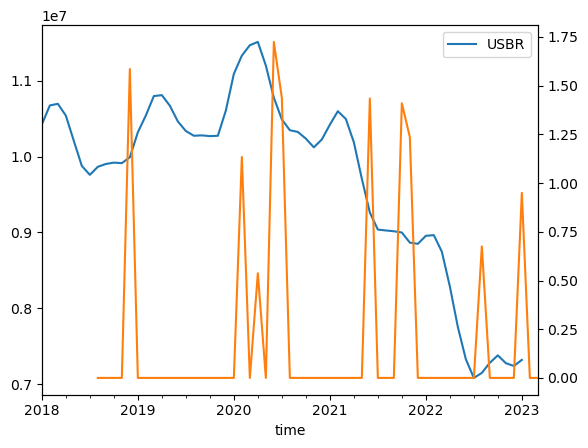

In [23]:
res_ref_M.plot(y='Lake/Reservoir Storage [af]', label='USBR')
test_vol.to_dataframe()['Watermask'].plot(label='Experimental',secondary_y= True)

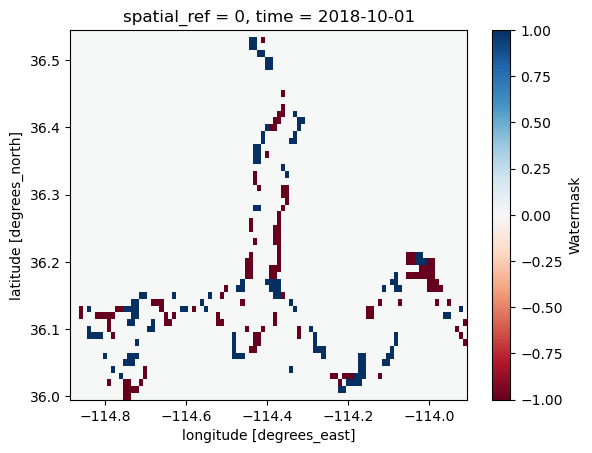

In [24]:
fw_diff_DA.isel(time=1).plot(cmap='RdBu')